# Titanic Survival Prediction using Machine Learning

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preparation

In [4]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
med = data_train['Age'].median()
data_train['Age'] = data_train['Age'].fillna(med)
data_test['Age'] = data_test['Age'].fillna(med)

In [7]:
le = LabelEncoder()
train = data_train
train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
le = LabelEncoder()
test = data_test
test['Sex'] = le.fit_transform(test['Sex'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

### Correlation between the parameters and the target variable (Survived)

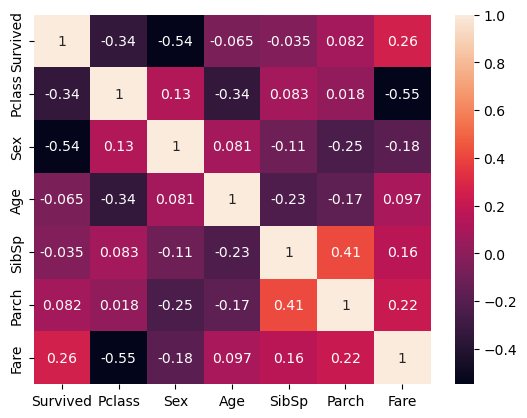

In [9]:
heatmap = sns.heatmap(data_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True)

### While comparing survived column with rest of the columns we can see that Parch and Fare shows little correlation and other columns are not related. But it does not mean that the other features are useless. We’ll explore more about them below.

### SibSp Column

In [10]:
data_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

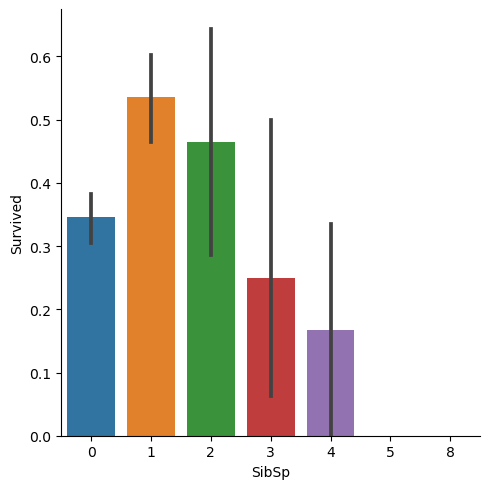

In [11]:
bar_sibsp = sns.catplot(y = 'Survived', x = 'SibSp', data = data_train, kind = 'bar')

### SibSp vs Survived graph shows passengers having 1 or 2 siblings have good chances of survival. More no. of siblings have fewer chances of survival.

### Gender Column

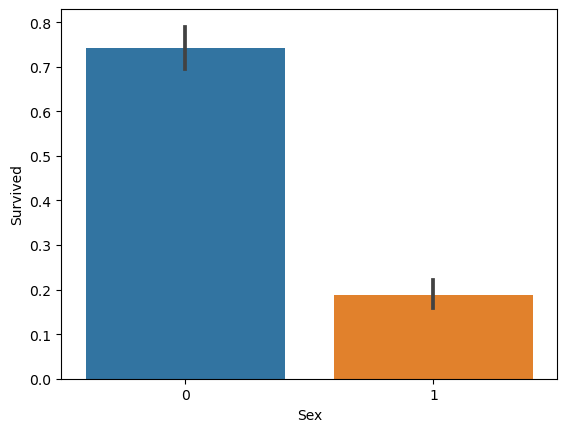

In [12]:
sexplot = sns.barplot(x="Sex", y="Survived", data=data_train)

### Sex vs Survived plot shows female have more chances of survival over male

### Age Column

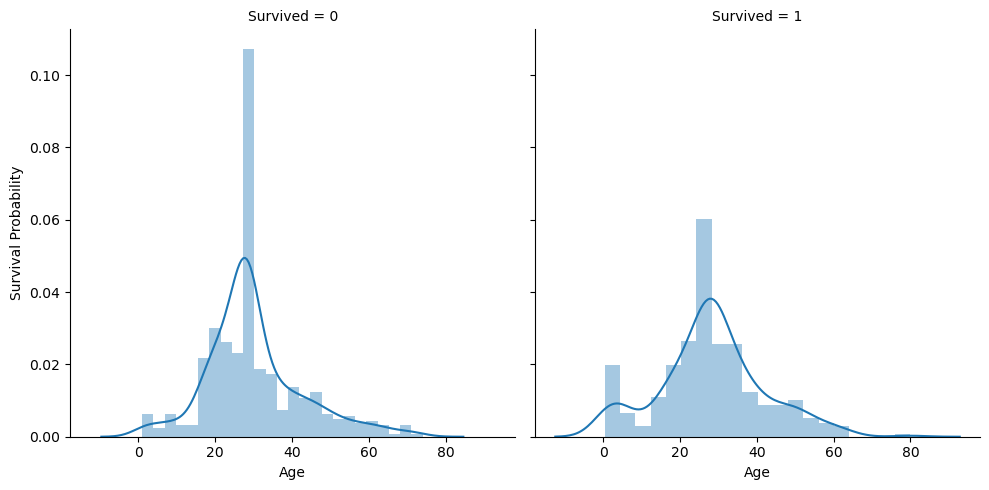

In [13]:
ageplot = sns.FacetGrid(data_train, col="Survived", height = 5)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

### Age vs Survival probability graph shows more the age of people are less likely to survive

### Pclass Column

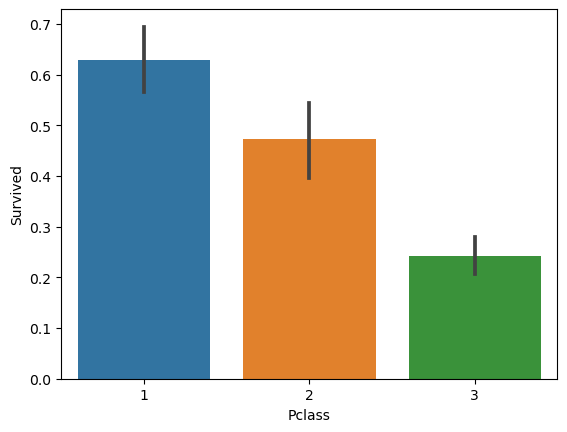

In [14]:
pclassplot = sns.barplot(x = 'Pclass', y = 'Survived', data = data_train)

### 1st class passengers has more chances of survival over 2nd and 3rd class passengers. Similarly 2nd class passengers has more chances of survival over 3rd class passengers

## Machine Learning Model to predict Titanic survival

In [15]:
pred = ['Pclass', 'Age', 'Sex', 'Fare']
x_train = pd.DataFrame(data_train[pred].values)
x_test = pd.DataFrame(data_test[pred].values)
y_train = pd.DataFrame(data_train['Survived'].values)
x_train[:5]

,0,1,2,3
0,3.0,22.0,1.0,7.2500
1,1.0,38.0,0.0,71.2833
2,3.0,26.0,0.0,7.9250
3,1.0,35.0,0.0,53.1000
4,3.0,35.0,1.0,8.0500


In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
x_test = x_test.fillna(0)

In [19]:
y_predict = model.predict(x_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## Implementing cross validation

In [20]:
model_l = LogisticRegression(C=10)
scores = cross_val_score(model_l, x_train, y_train, cv=4)

In [21]:
np.average(scores)

0.7845210681533551

In [22]:
model_l.fit(x_train, y_train)


LogisticRegression(C=10)

In [23]:
predict = model_l.predict(x_test)
predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

#### So, this was all about the titanic survival prediction project.